# British Airways Customer Review Analysis

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv("BA_reviews2.csv")

In [80]:
df.head()

,Unnamed: 0,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,0,Not Verified,NaN,Solo Leisure,Economy Class,Las Vegas to Venice,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,My itinerary was supposed to be Las Vegas-Ch...
1,1,✅ Trip Verified,Boeing 777-300,Family Leisure,Premium Economy,London to New York,May 2023,4.0,4.0,3.0,5.0,5.0,4.0,4,yes,9.0,Busy day at LHR and flight full. Lounge crow...
2,2,✅ Trip Verified,A320,Couple Leisure,Economy Class,Lisbon to London,May 2023,1.0,3.0,NaN,1.0,1.0,1.0,2,no,2.0,Worst seats I have ever encountered in econom...
3,3,Not Verified,NaN,Couple Leisure,Premium Economy,Dallas to Madrid via London,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,Top Ten REASONS to not use British Airways To...
4,4,Not Verified,NaN,Couple Leisure,Economy Class,London to Valencia,March 2023,4.0,4.0,NaN,NaN,NaN,5.0,4,yes,10.0,Easy check in on the way to Heathrow. The fl...


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3430 non-null   int64  
 1   status           2032 non-null   object 
 2   aircraft         1851 non-null   object 
 3   travel_type      2786 non-null   object 
 4   travel_class     3429 non-null   object 
 5   route            2781 non-null   object 
 6   date             2778 non-null   object 
 7   seating_comfort  3327 non-null   float64
 8   staff_service    3317 non-null   float64
 9   food_quality     3081 non-null   float64
 10  entertainment    2365 non-null   float64
 11  wifi             558 non-null    float64
 12  ground_service   2716 non-null   float64
 13  value_for_money  3430 non-null   int64  
 14  recommended      3430 non-null   object 
 15  overall_rating   3426 non-null   float64
 16  review           3430 non-null   object 
dtypes: float64(7),

In [82]:
df.isnull().sum()

Unnamed: 0            0
status             1398
aircraft           1579
travel_type         644
travel_class          1
route               649
date                652
seating_comfort     103
staff_service       113
food_quality        349
entertainment      1065
wifi               2872
ground_service      714
value_for_money       0
recommended           0
overall_rating        4
review                0
dtype: int64

In [83]:
df.isnull().sum()/len(df)

Unnamed: 0         0.000000
status             0.407580
aircraft           0.460350
travel_type        0.187755
travel_class       0.000292
route              0.189213
date               0.190087
seating_comfort    0.030029
staff_service      0.032945
food_quality       0.101749
entertainment      0.310496
wifi               0.837318
ground_service     0.208163
value_for_money    0.000000
recommended        0.000000
overall_rating     0.001166
review             0.000000
dtype: float64

In [84]:
df = df.drop(columns = "Unnamed: 0")

In [85]:
df.isnull().sum()/len(df)

status             0.407580
aircraft           0.460350
travel_type        0.187755
travel_class       0.000292
route              0.189213
date               0.190087
seating_comfort    0.030029
staff_service      0.032945
food_quality       0.101749
entertainment      0.310496
wifi               0.837318
ground_service     0.208163
value_for_money    0.000000
recommended        0.000000
overall_rating     0.001166
review             0.000000
dtype: float64

In [86]:
df["status"].value_counts()

✅ Trip Verified       1044
✅ Verified Review      770
Not Verified           193
❎ Unverified            20
❎ Not Verified           5
Name: status, dtype: int64

In [87]:
df["length"] = df["review"].apply(len)
df.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,length
0,Not Verified,NaN,Solo Leisure,Economy Class,Las Vegas to Venice,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,My itinerary was supposed to be Las Vegas-Ch...,2351
1,✅ Trip Verified,Boeing 777-300,Family Leisure,Premium Economy,London to New York,May 2023,4.0,4.0,3.0,5.0,5.0,4.0,4,yes,9.0,Busy day at LHR and flight full. Lounge crow...,324
2,✅ Trip Verified,A320,Couple Leisure,Economy Class,Lisbon to London,May 2023,1.0,3.0,NaN,1.0,1.0,1.0,2,no,2.0,Worst seats I have ever encountered in econom...,532
3,Not Verified,NaN,Couple Leisure,Premium Economy,Dallas to Madrid via London,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,Top Ten REASONS to not use British Airways To...,2286
4,Not Verified,NaN,Couple Leisure,Economy Class,London to Valencia,March 2023,4.0,4.0,NaN,NaN,NaN,5.0,4,yes,10.0,Easy check in on the way to Heathrow. The fl...,519


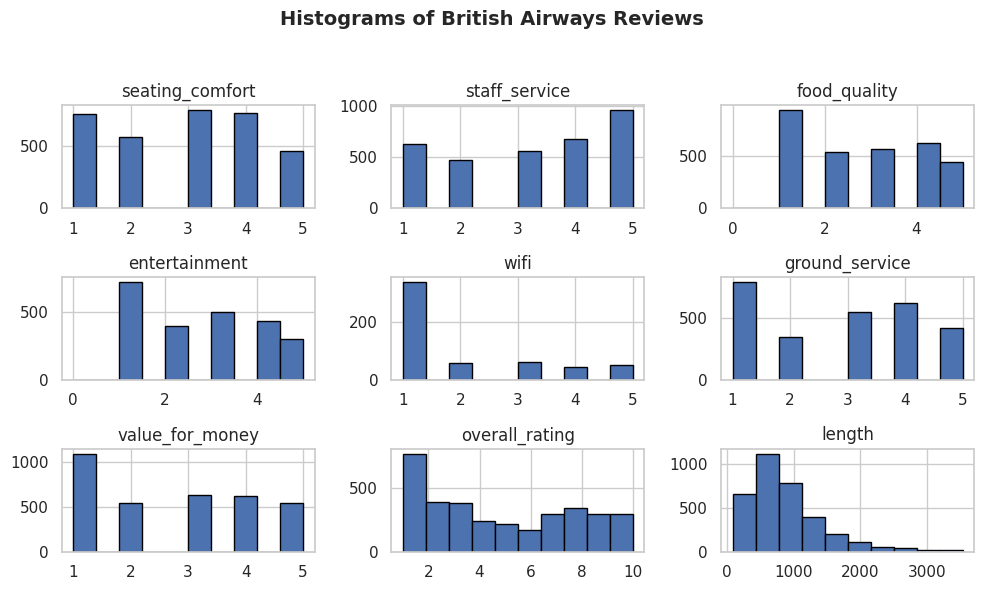

In [88]:
# Plotting histograms
df.hist(bins=10, edgecolor='black', figsize=(10, 6))

# Adding titles and labels
plt.suptitle('Histograms of British Airways Reviews', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusting layout and spacing
plt.show()

In [89]:
df.describe()

,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,overall_rating,length
count,3327.000000,3317.000000,3081.000000,2365.000000,558.000000,2716.000000,3430.000000,3426.000000,3430.000000
mean,2.878870,3.261079,2.713405,2.653277,1.935484,2.825479,2.702041,4.766200,887.580466
std,1.356947,1.484937,1.439915,1.407270,1.363593,1.449363,1.469778,3.160603,570.809609
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,83.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,487.000000
50%,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,4.000000,742.500000
75%,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,8.000000,1116.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,3529.000000


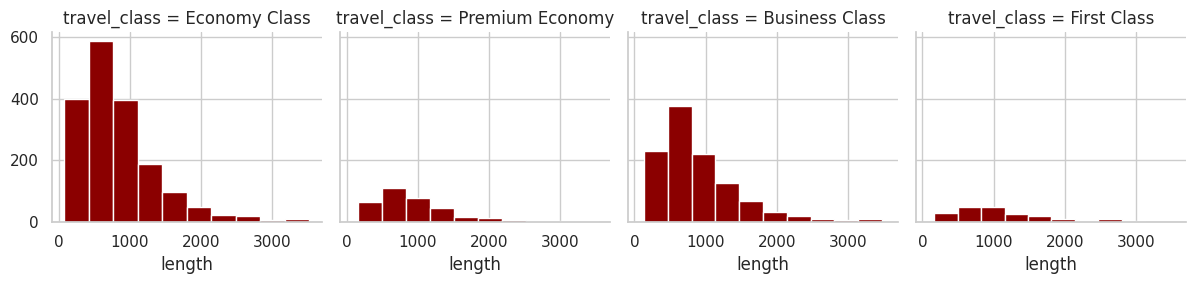

In [90]:
g = sns.FacetGrid(data = df, col= "travel_class", col_wrap = 5)
g.map(plt.hist, "length", bins = 10, color = "darkred")

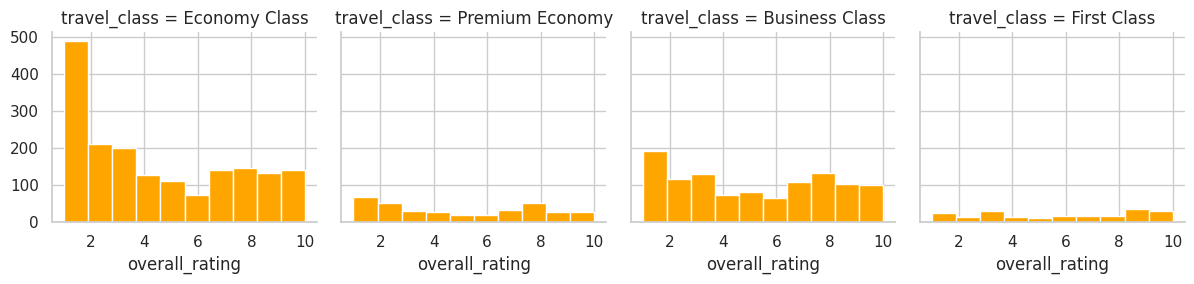

In [91]:
g = sns.FacetGrid(data = df, col= "travel_class", col_wrap = 5)
g.map(plt.hist, "overall_rating", bins = 10, color = "orange")

In [92]:
df["travel_class"].value_counts()/len(df)

Economy Class      0.517493
Business Class     0.321574
Premium Economy    0.102332
First Class        0.058309
Name: travel_class, dtype: float64

In [131]:
average_rating_per_class = df.groupby('travel_class')['overall_rating'].mean()

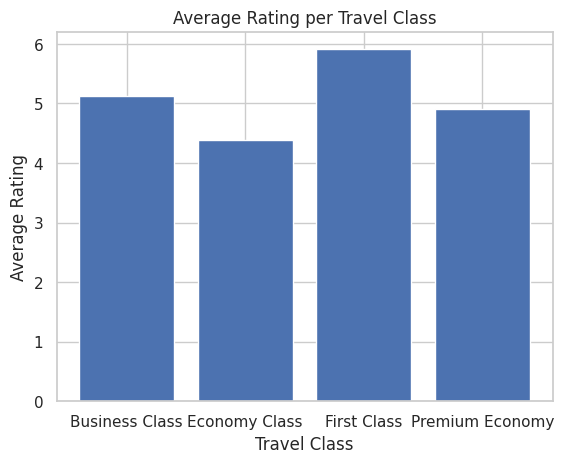

In [133]:
plt.bar(average_rating_per_class.index, average_rating_per_class.values)
plt.xlabel('Travel Class')
plt.ylabel('Average Rating')
plt.title('Average Rating per Travel Class')
plt.show()

<ipython-input-93-d13953398312>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


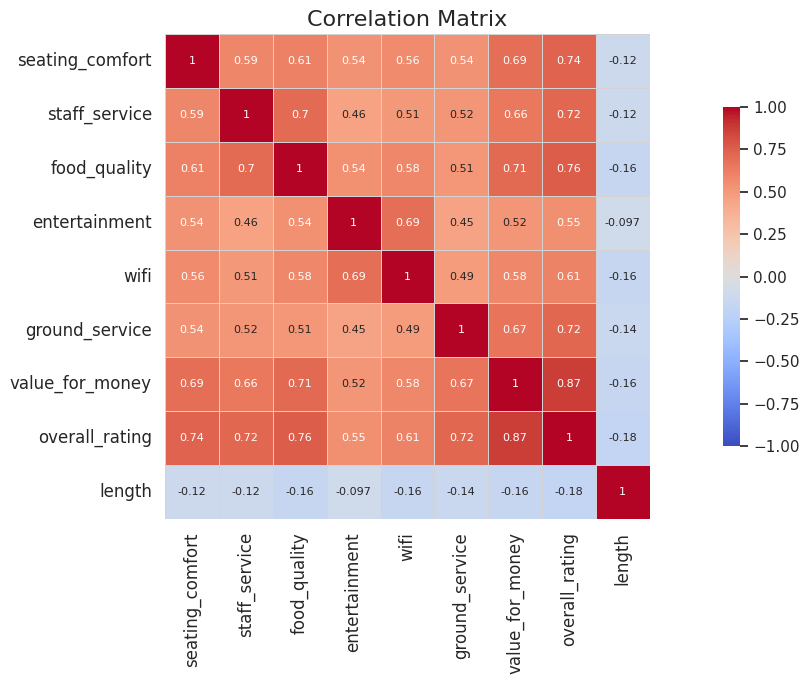

In [93]:
# Correlation Matrix, to check for multi-collinearity

# Compute the correlation matrix
corr_matrix = df.corr()

# Set a custom color palette
color_palette = sns.color_palette("coolwarm", as_cmap=True)

# Create a custom theme
sns.set_theme(style='whitegrid')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True, cmap=color_palette, vmin=-1, vmax=1,
            linewidths=0.5, linecolor='lightgray', square=True, cbar=True, cbar_kws={'shrink': 0.7}, annot_kws={'fontsize': 8})
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<Axes: >

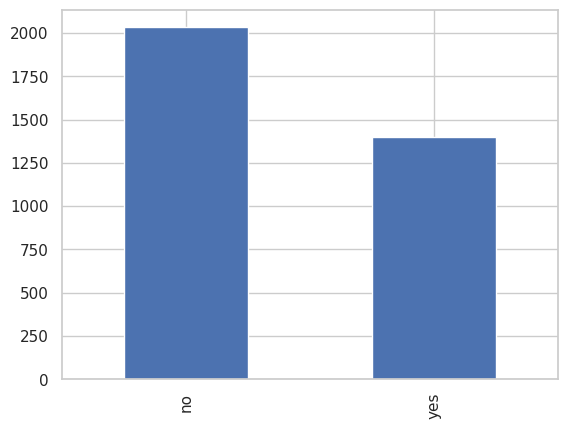

In [94]:
df["recommended"].value_counts().plot(kind = "bar")

## Sentiment Analysis 

In [95]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a sentence
def remove_stop_words(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the remove_stop_words function to the 'reviews' column
df['review'] = df['review'].apply(remove_stop_words)


In [98]:
# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply the get_sentiment_score function to the 'reviews' column
df['sentiment_score'] = df['review'].apply(get_sentiment_score)


In [99]:
df.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,length,sentiment_score
0,Not Verified,NaN,Solo Leisure,Economy Class,Las Vegas to Venice,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,itinerary supposed Las Vegas-Chicago-London-Ve...,2351,-0.9042
1,✅ Trip Verified,Boeing 777-300,Family Leisure,Premium Economy,London to New York,May 2023,4.0,4.0,3.0,5.0,5.0,4.0,4,yes,9.0,Busy day LHR flight full . Lounge crowded B ga...,324,0.9538
2,✅ Trip Verified,A320,Couple Leisure,Economy Class,Lisbon to London,May 2023,1.0,3.0,NaN,1.0,1.0,1.0,2,no,2.0,Worst seats ever encountered economy class . l...,532,-0.8555
3,Not Verified,NaN,Couple Leisure,Premium Economy,Dallas to Madrid via London,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,Top Ten REASONS use British Airways : Aware No...,2286,0.6791
4,Not Verified,NaN,Couple Leisure,Economy Class,London to Valencia,March 2023,4.0,4.0,NaN,NaN,NaN,5.0,4,yes,10.0,Easy check way Heathrow . flight time issues ....,519,0.4939


In [102]:
df["sentiment_score"].describe()

count    3430.000000
mean        0.317091
std         0.719450
min        -0.994500
25%        -0.440400
50%         0.709600
75%         0.939825
max         0.998400
Name: sentiment_score, dtype: float64

In [104]:
from wordcloud import WordCloud

# Generate word cloud of most frequent words
all_words = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

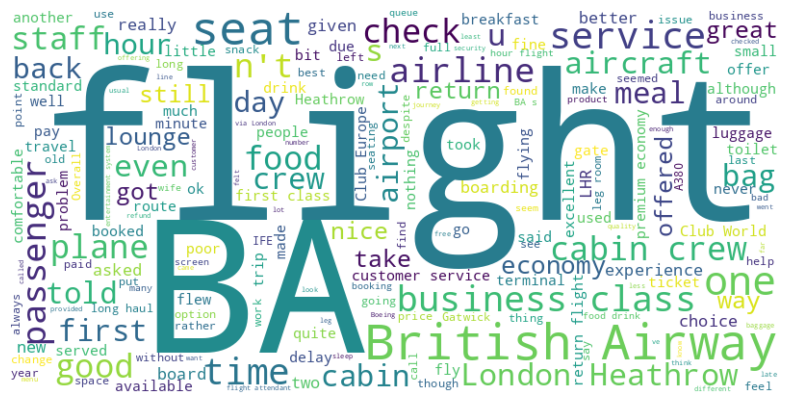

In [105]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

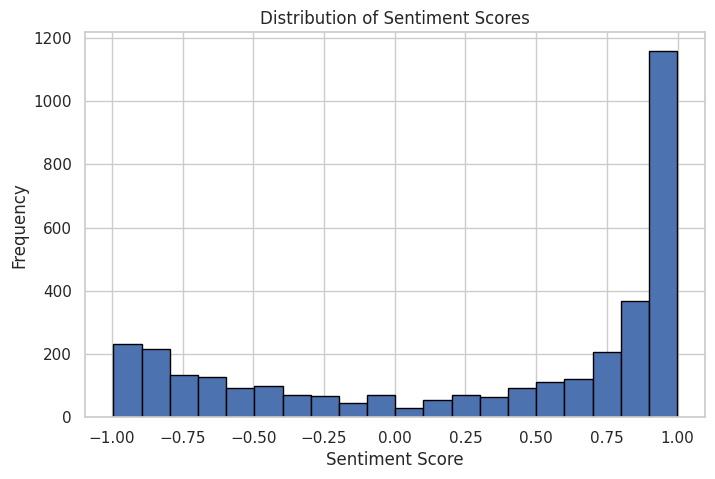

In [106]:
# Plot histogram of sentiment scores
plt.figure(figsize=(8, 5))
plt.hist(df['sentiment_score'], bins=20, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()


In [109]:
df.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,length,sentiment_score
0,Not Verified,NaN,Solo Leisure,Economy Class,Las Vegas to Venice,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,itinerary supposed Las Vegas-Chicago-London-Ve...,2351,-0.9042
1,✅ Trip Verified,Boeing 777-300,Family Leisure,Premium Economy,London to New York,May 2023,4.0,4.0,3.0,5.0,5.0,4.0,4,yes,9.0,Busy day LHR flight full . Lounge crowded B ga...,324,0.9538
2,✅ Trip Verified,A320,Couple Leisure,Economy Class,Lisbon to London,May 2023,1.0,3.0,NaN,1.0,1.0,1.0,2,no,2.0,Worst seats ever encountered economy class . l...,532,-0.8555
3,Not Verified,NaN,Couple Leisure,Premium Economy,Dallas to Madrid via London,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,Top Ten REASONS use British Airways : Aware No...,2286,0.6791
4,Not Verified,NaN,Couple Leisure,Economy Class,London to Valencia,March 2023,4.0,4.0,NaN,NaN,NaN,5.0,4,yes,10.0,Easy check way Heathrow . flight time issues ....,519,0.4939


## Time series Analysis

In [117]:
df['date'] = pd.to_datetime(df['date'], format='%B %Y')

In [118]:
df.set_index('date', inplace=True)

In [120]:
df_resampled = df['overall_rating'].resample('M').mean()

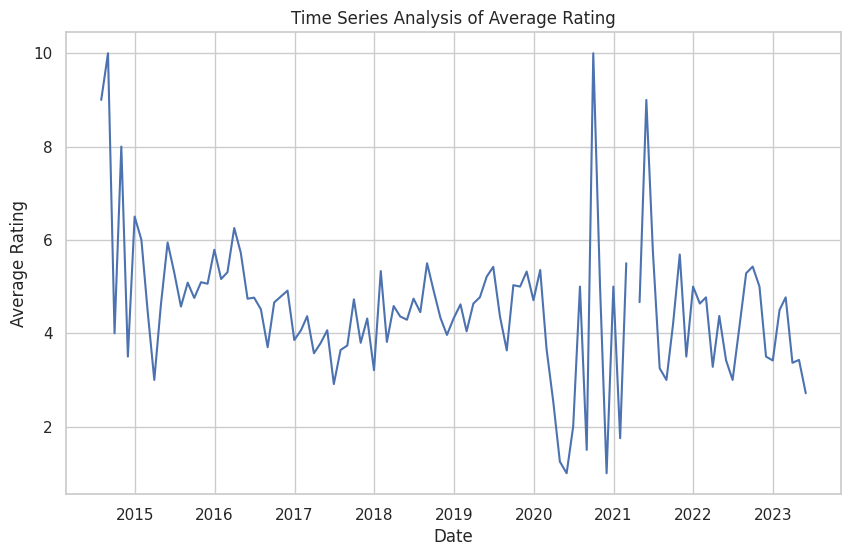

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled.values)
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.title('Time Series Analysis of Average Rating')
plt.show()

In [126]:
df_resampled = df_resampled.interpolate(method='linear')

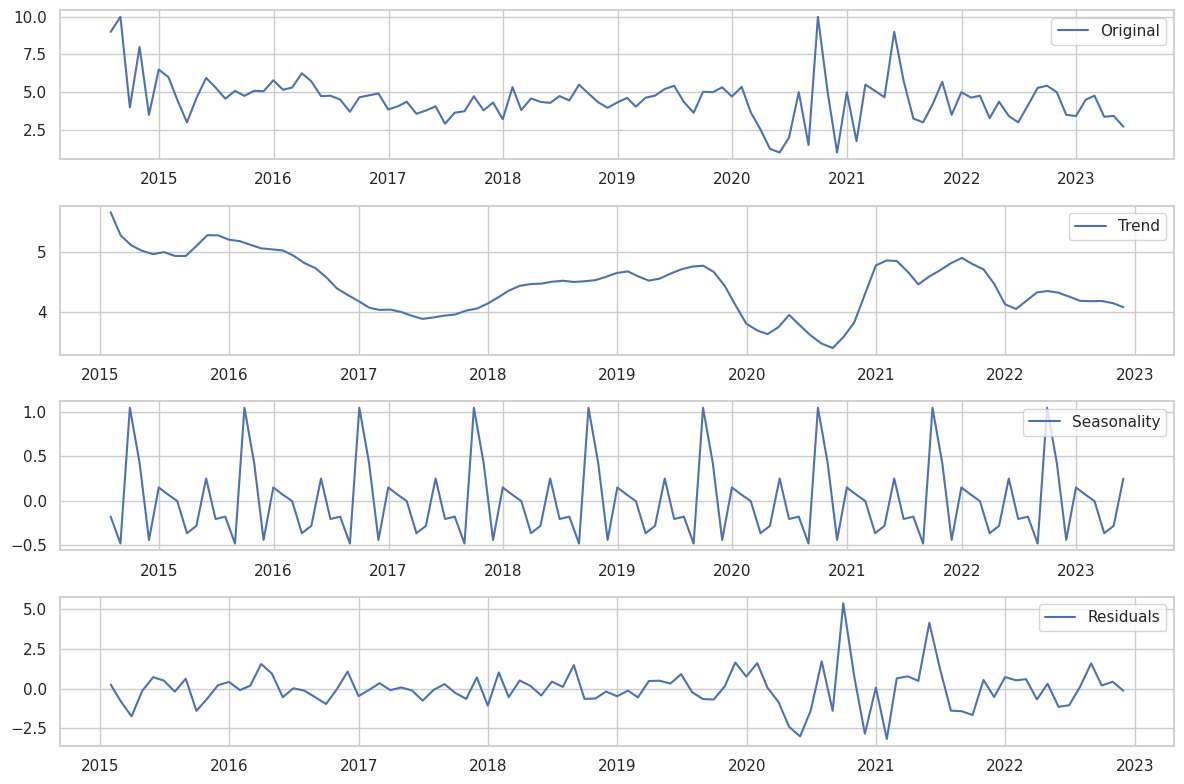

In [127]:
import statsmodels.api as sm

# Perform decomposition
decomposition = sm.tsa.seasonal_decompose(df_resampled, model='additive')

# Extract trend, seasonality, and residuals
trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_resampled, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonality, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
